In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sber_data = pd.read_csv('sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [2]:
sber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   full_sq                                30471 non-null  int64  
 2   life_sq                                24088 non-null  float64
 3   floor                                  30304 non-null  float64
 4   sub_area                               30471 non-null  object 
 5   preschool_quota                        23783 non-null  float64
 6   preschool_education_centers_raion      30471 non-null  int64  
 7   school_quota                           23786 non-null  float64
 8   school_education_centers_raion         30471 non-null  int64  
 9   school_education_centers_top_20_raion  30471 non-null  int64  
 10  hospital_beds_raion                    16030 non-null  float64
 11  he

In [3]:
sber_data['price_doc'].max()

111111112

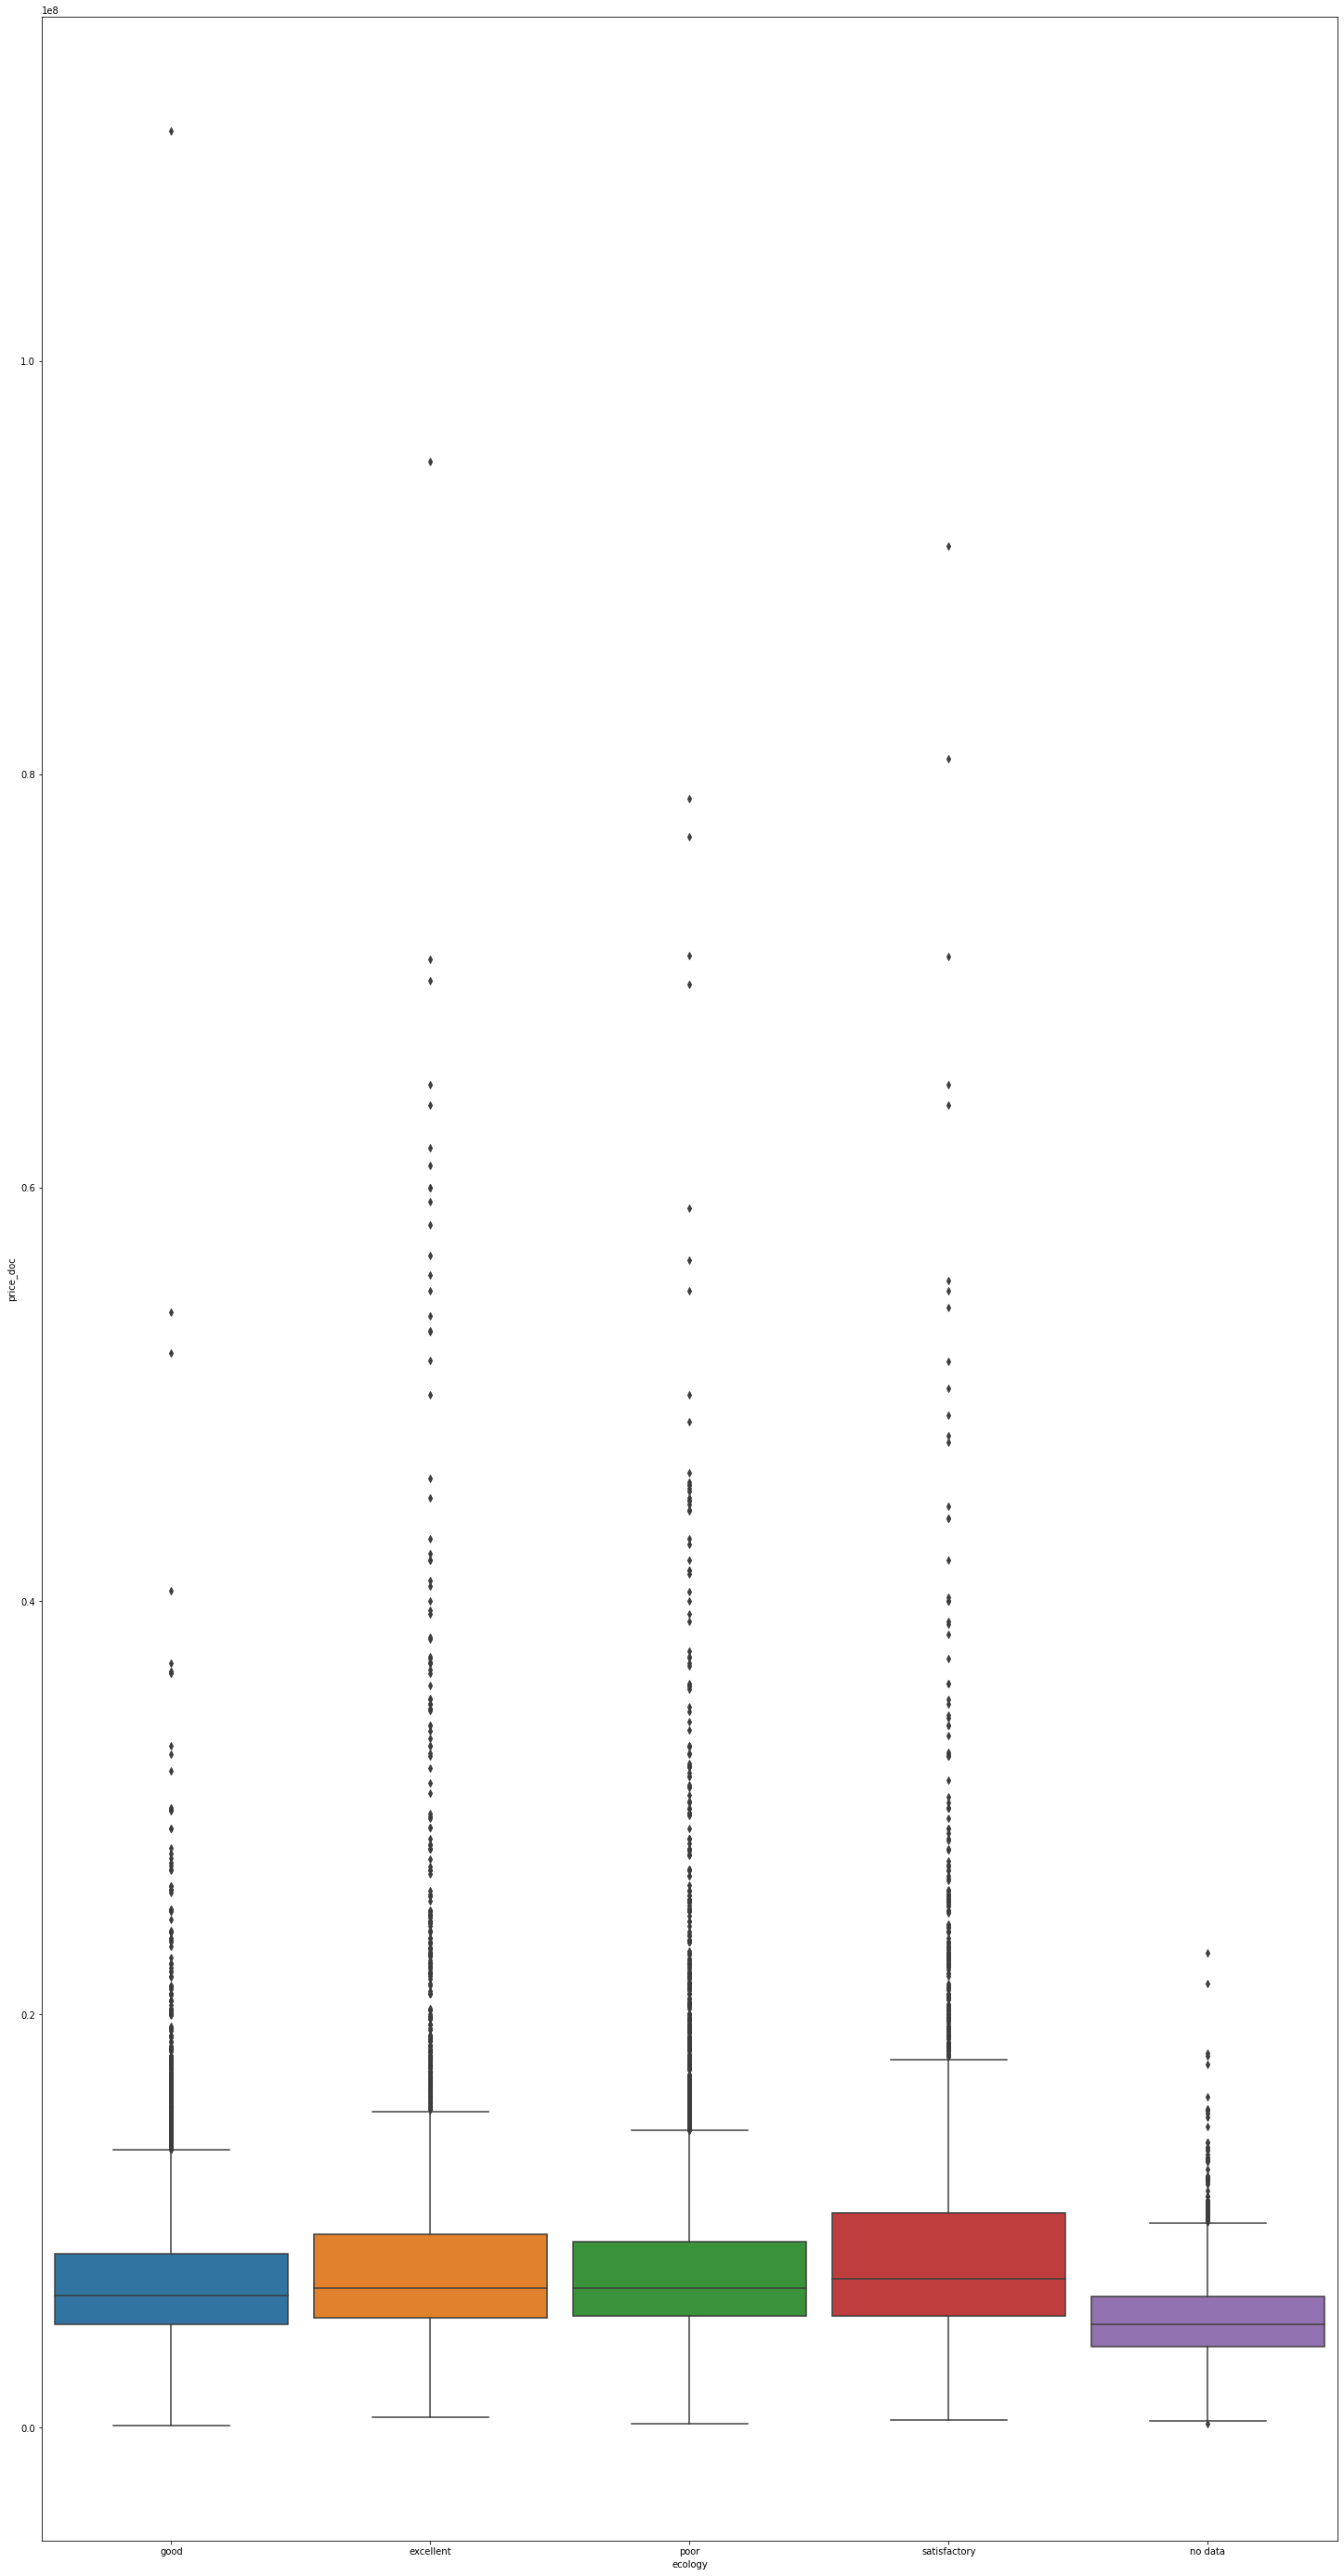

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 50))

boxplot = sns.boxplot(
    data=sber_data,
    x='ecology',
    y='price_doc',
    orient='v',
    width=0.9,
    ax=axes,
)
# axes.yaxis.set_major_locator(ticker.MultipleLocator(200000))
# boxplot.set_xlabel('Баланс в долларах', fontsize=14)

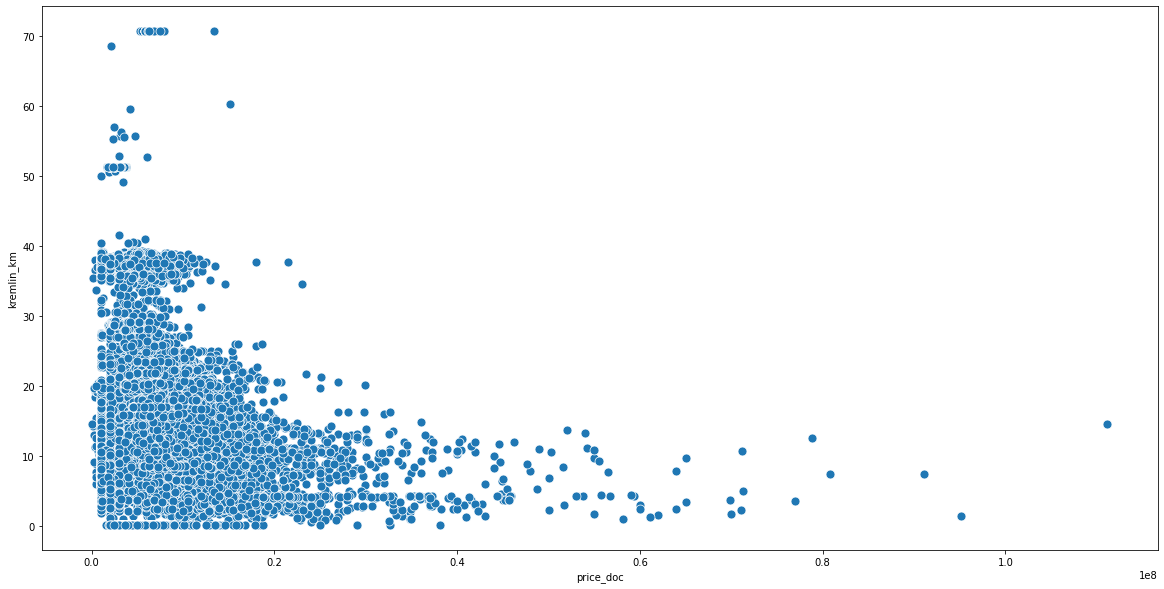

In [5]:
fig= plt.figure(figsize=(20, 10))

scatterplot = sns.scatterplot(
    data=sber_data,
    x='price_doc',
    y='kremlin_km',
    # hue='Exited',
    s=80
)

In [6]:
#создаем копию исходной таблицы
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(how='any', thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [7]:
# import pandas as pd
# """
# Ваша задача очистить данную таблицу от пропусков следующим образом:
# - Если признак имеет больше 50% пропущенных значений - удалите его
# - Для оставшихся данных: если в строке более 2 пропусков - удалите строку
# - Для оставшихся данных: числовые признаки заполните средним значением, а категориальные - модой
# Результат должен находиться в переменной df
# """
# df = pd.read_csv('./Root/data/test_data.csv')
#
#
# n = df.shape[0]
# thresh = n*0.5
# df = df.dropna(how='any', thresh=thresh, axis=1)
#
# m = df.shape[1]
# df = df.dropna(how='any', thresh=m-2, axis=0)
#
#
# for i in list(df.columns):
#
#     if df[i].dtypes in ['object']:
#         df[i] = df[i].fillna(df[i].mode()[0])
#
#     else: df[i] = df[i].fillna(df[i].mean())
#
#
# print(df)

In [8]:
import pandas as pd

def outliers_iqr_mod(data, feature, log_scale=False, left=3, right=3):
    """
    Давайте немного модифицируем нашу функцию outliers_iqr().
    Добавьте в нее параметры left и right, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5).
    Функция, как и раньше должна возвращать потенциальные выбросы и очищенный DataFrame.
    """
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]

    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)

    iqr = quartile_3 - quartile_1

    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)

    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]

    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', log_scale=True)

print(outliers.shape[0])
print(cleaned.shape[0])

92
30379


In [9]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    """
    Давайте расширим правило 3ех сигм, чтобы иметь возможность учитывать особенности данных.
    Добавьте в функцию outliers_z_score() параметры left и right, которые будут задавать число сигм (стандартных отклонений)
    влево и вправо соответственно, которые определяют границы метода z-отклонения.
    По умолчанию оба параметры равны 3
    """
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 146
Результирующее число записей: 30325


-0.6867156797188926

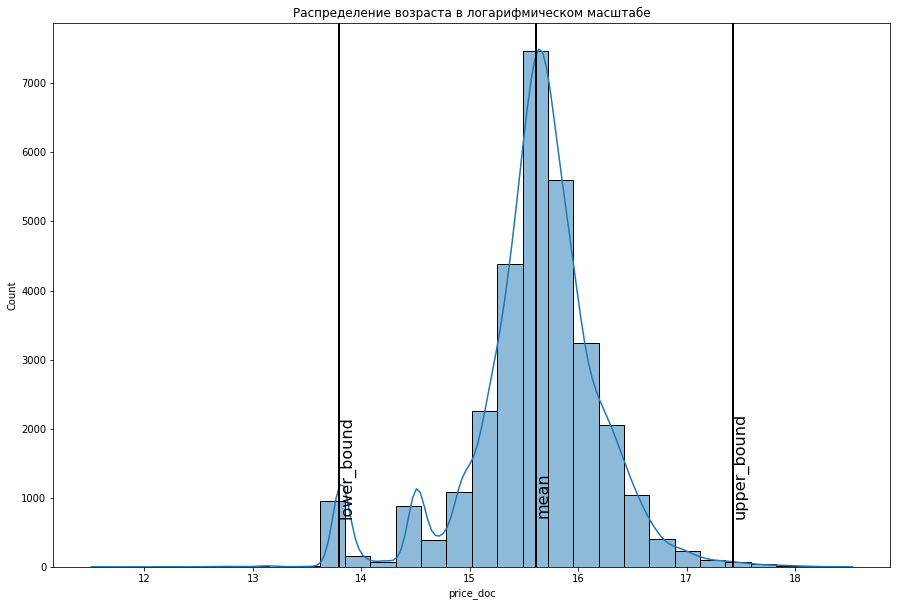

In [10]:
fig, axes = plt.subplots(figsize=(15, 10))

log_age = np.log(sber_data['price_doc'])
log_age_mean = log_age.mean()
log_age_max = (log_age.groupby(log_age).count()).max()
sigma = log_age.std()
lower_bound = log_age_mean - 3 * sigma
upper_bound = log_age_mean + 3 * sigma

histplot = sns.histplot(
    log_age,
    bins=30,
    kde=True
)
histplot.axvline(log_age_mean, color='k', lw=2)
histplot.text(x=log_age_mean, y=log_age_max, s='mean', fontsize=16, rotation=90)

histplot.axvline(lower_bound, color='k', lw=2)
histplot.text(x=lower_bound, y=log_age_max, s='lower_bound', fontsize=16, rotation=90)

histplot.axvline(upper_bound, color='k', lw=2)
histplot.text(x=upper_bound, y=log_age_max, s='upper_bound', fontsize=16, rotation=90)

histplot.set_title('Распределение возраста в логарифмическом масштабе')

log_age.skew()

In [11]:
diabetes = pd.read_csv('diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [12]:
mask = diabetes.duplicated()
duplicates = diabetes[mask]
diabetes.shape
# print(f'Число найденных дубликатов: {duplicates.shape[0]}')

(778, 10)

In [13]:
diabetes = diabetes.drop_duplicates()
# print(f'Результирующее число записей: {dedupped.shape[0]}')
diabetes.shape[0]

768

In [14]:
low_information_cols = []

#цикл по всем столбцам
for col in diabetes.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.99:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.99:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

diabetes = diabetes.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabetes.shape[1]}')

Gender: 100.0% одинаковых значений
Результирующее число признаков: 9


In [15]:
diabetes['Glucose'] = diabetes['Glucose'].apply(lambda x: np.nan if x == 0 else x)
diabetes['BloodPressure'] = diabetes['BloodPressure'].apply(lambda x: np.nan if x == 0 else x)
diabetes['SkinThickness'] = diabetes['SkinThickness'].apply(lambda x: np.nan if x == 0 else x)
diabetes['Insulin'] = diabetes['Insulin'].apply(lambda x: np.nan if x == 0 else x)
diabetes['BMI'] = diabetes['BMI'].apply(lambda x: np.nan if x == 0 else x)

diabetes['Insulin'].isnull().mean()

0.4869791666666667

In [16]:
low_information_cols = []

#цикл по всем столбцам
for col in diabetes.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.3:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')

diabetes = diabetes.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabetes.shape[1]}')

Outcome: 65.1% одинаковых значений
Результирующее число признаков: 8


In [17]:
diabetes = diabetes.dropna(how='any', thresh=diabetes.shape[1]-3, axis=0)
diabetes.shape

(761, 8)

In [18]:
for i in list(diabetes.columns):

    if diabetes[i].dtypes in ['object']:
        diabetes[i] = diabetes[i].fillna(diabetes[i].mode()[0])

    else: diabetes[i] = diabetes[i].fillna(diabetes[i].median())
diabetes['SkinThickness'].mean()

29.109067017082786

In [19]:
def outliers_iqr_mod(data, feature, log_scale=False, left=1.5, right=1.5):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]

    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)

    iqr = quartile_3 - quartile_1

    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)

    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]

    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)

print(outliers.shape[0])
print(cleaned.shape[0])

0
761


In [20]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):

    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_z_score_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 761
